<a href="https://colab.research.google.com/github/sera0911/asia_ai_study/blob/main/MachinLearning/ML_%EA%B3%BC%EC%A0%9C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

대출 적격성 분류 분석  
madfhantr.csv  
1 단계 : 데이터로드 , 확인, 수정  
 (결측치 확인 후 삭제  
  원본 데이터 세트 - 614rows, 13특성  
   수정된 데이터 세트 - 480rows, 13특성)  


2 단계 범주 형 데이터를 LabelEncoding, One-Hot Encoding  
    ( Gender - 남 1, 여 0  
      Married - Yes 1, No 0  
      Self_Employed  - Yes 1, No 0  
      Education -  Graduate 1, Not Graduate 0)  
3 단계 : 데이터 세트를 학습 세트와 테스트 세트로 분할  
4 단계 : 모델을 구축 (DecisionTree)  
   Gender특성의 정보이득?  
   Married특성의 정보이득?  
   Education 특성의 정보이득?  
    Self_Employed  특성의 정보이득?  
   Credit Score 특성의 정보이득?  
5 단계 : 의사 결정 트리 시각화  
6 단계 : 모델 평가 지표 정확도 출력  

In [2]:
# 1 단계 : 데이터로드 , 확인, 수정  

import pandas as pd

train = pd.read_csv('madfhantr.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
train.dropna(inplace=True)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [8]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
#2단계 범주 형 데이터를 LabelEncoding, One-Hot Encoding   

train = train[['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Loan_Status']]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          480 non-null    object 
 1   Married         480 non-null    object 
 2   Education       480 non-null    object 
 3   Self_Employed   480 non-null    object 
 4   Credit_History  480 non-null    float64
 5   Loan_Status     480 non-null    object 
dtypes: float64(1), object(5)
memory usage: 26.2+ KB


In [11]:
train['Gender'] = train['Gender'].replace(to_replace='Male', value='1')
train['Gender'] = train['Gender'].replace(to_replace='Female', value='0')
train.head()

,Gender,Married,Education,Self_Employed,Credit_History,Loan_Status
1,1,Yes,Graduate,No,1.0,N
2,1,Yes,Graduate,Yes,1.0,Y
3,1,Yes,Not Graduate,No,1.0,Y
4,1,No,Graduate,No,1.0,Y
5,1,Yes,Graduate,Yes,1.0,Y


In [12]:
train['Married'] = train['Married'].replace(to_replace='Yes', value='1')
train['Married'] = train['Married'].replace(to_replace='No', value='0')
train.head()

,Gender,Married,Education,Self_Employed,Credit_History,Loan_Status
1,1,1,Graduate,No,1.0,N
2,1,1,Graduate,Yes,1.0,Y
3,1,1,Not Graduate,No,1.0,Y
4,1,0,Graduate,No,1.0,Y
5,1,1,Graduate,Yes,1.0,Y


In [14]:
train['Self_Employed'] = train['Self_Employed'].replace(to_replace='No', value='0')
train['Self_Employed'] = train['Self_Employed'].replace(to_replace='Yes', value='1')
train['Education'] = train['Education'].replace(to_replace='Graduate', value='1')
train['Education'] = train['Education'].replace(to_replace='Not Graduate', value='0')
train.head()

,Gender,Married,Education,Self_Employed,Credit_History,Loan_Status
1,1,1,1,1,1.0,N
2,1,1,1,0,1.0,Y
3,1,1,0,1,1.0,Y
4,1,0,1,1,1.0,Y
5,1,1,1,0,1.0,Y


In [17]:
X = train.drop(columns=['Loan_Status'])
y = train.Loan_Status
print(X.head())
print(y[:5])

  Gender Married Education Self_Employed  Credit_History
1      1       1         1             1             1.0
2      1       1         1             0             1.0
3      1       1         0             1             1.0
4      1       0         1             1             1.0
5      1       1         1             0             1.0
1    N
2    Y
3    Y
4    Y
5    Y
Name: Loan_Status, dtype: object


In [18]:
# 3 단계 : 데이터 세트를 학습 세트와 테스트 세트로 분할

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #test_size= 테스트 데이터셋의 비율, random_state= 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값
[출처] [Python] sklearn의 train_test_split() 사용법|작성자 Paris Lee



In [19]:
# 4 단계 : 모델을 구축 (DecisionTree) 

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)  #max_depth=최대깊이를 3으로 지정
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

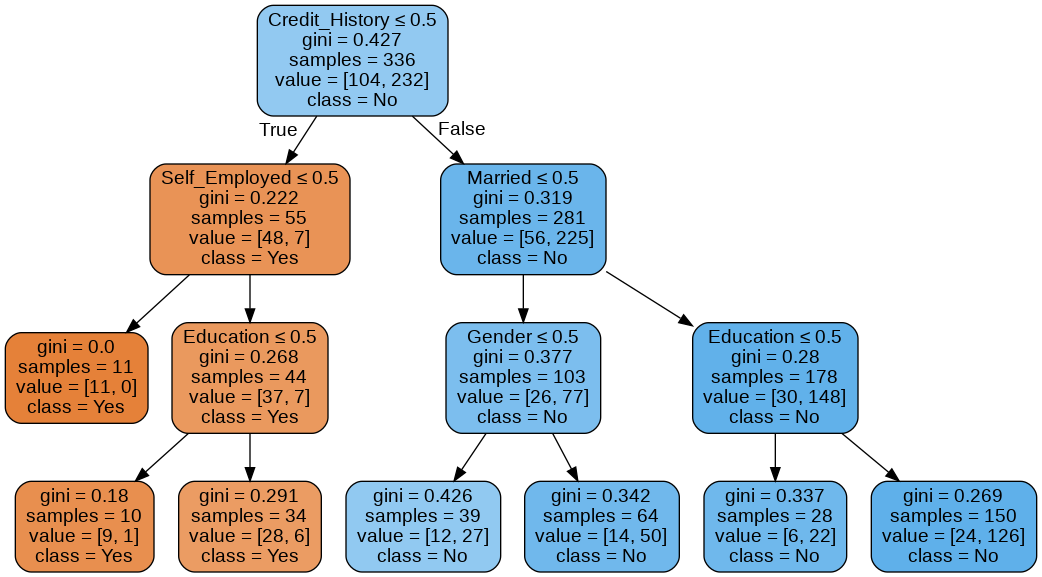

In [32]:
# 5 단계 : 의사 결정 트리 시각화

import graphviz
from sklearn import tree
#from pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History'],
                                class_names=['Yes', 'No'], filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data) # 그래프를 그립니다
Image(graph.create_png())

In [33]:
# 6 단계 : 모델 평가 지표 정확도 출력

clf.score(X_test,y_test)

0.7986111111111112